In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv("Phonepe.csv")

In [32]:
df

,Transaction_ID,Amount,User_ID,Service,Service Type,Payment_Status,Reason,Date
0,RCG_0C338474B366,926.59,PP0021371,Recharge_Bills,FASTag Recharge,Successful,Successful,6/9/2024
1,RCG_6B3B86B07A76,1211.64,PP0002388,Recharge_Bills,DTH,Successful,Successful,8/4/2024
2,RCG_767822392A0E,746.27,PP1101831,Recharge_Bills,Cable TV,Successful,Successful,2/19/2024
3,RCG_527E6AC74B11,1319.89,PP0033099,Recharge_Bills,Mobile Recharge,Successful,Successful,12/22/2024
4,RCG_6B50A8C694E1,112.44,PP1059869,Recharge_Bills,Cable TV,Successful,Successful,9/7/2024
...,...,...,...,...,...,...,...,...
299995,INS_24E64F9B7299,13071.42,PP0028490,Insurance,Bike,Successful,Successful,1/7/2024
299996,INS_3BE29AC5D50A,15401.86,PP0014627,Insurance,Term Life,Successful,Successful,8/29/2024
299997,INS_DABD5CA9E4DB,10671.15,PP1082547,Insurance,Health,Successful,Successful,8/5/2024
299998,INS_551C3CA76408,4041.38,PP1064893,Insurance,Bike,Failed,Wrong PIN,5/14/2024


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  300000 non-null  object 
 1   Amount          300000 non-null  float64
 2   User_ID         300000 non-null  object 
 3   Service         300000 non-null  object 
 4   Service Type    300000 non-null  object 
 5   Payment_Status  300000 non-null  object 
 6   Reason          300000 non-null  object 
 7   Date            300000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 18.3+ MB


In [34]:
df.describe()

,Amount
count,300000.000000
mean,11581.073114
std,21376.115812
min,20.000000
25%,1345.587500
50%,3091.450000
75%,8769.805000
max,99999.010000


In [35]:
df.head()

,Transaction_ID,Amount,User_ID,Service,Service Type,Payment_Status,Reason,Date
0,RCG_0C338474B366,926.59,PP0021371,Recharge_Bills,FASTag Recharge,Successful,Successful,6/9/2024
1,RCG_6B3B86B07A76,1211.64,PP0002388,Recharge_Bills,DTH,Successful,Successful,8/4/2024
2,RCG_767822392A0E,746.27,PP1101831,Recharge_Bills,Cable TV,Successful,Successful,2/19/2024
3,RCG_527E6AC74B11,1319.89,PP0033099,Recharge_Bills,Mobile Recharge,Successful,Successful,12/22/2024
4,RCG_6B50A8C694E1,112.44,PP1059869,Recharge_Bills,Cable TV,Successful,Successful,9/7/2024


In [36]:
df.tail()

,Transaction_ID,Amount,User_ID,Service,Service Type,Payment_Status,Reason,Date
299995,INS_24E64F9B7299,13071.42,PP0028490,Insurance,Bike,Successful,Successful,1/7/2024
299996,INS_3BE29AC5D50A,15401.86,PP0014627,Insurance,Term Life,Successful,Successful,8/29/2024
299997,INS_DABD5CA9E4DB,10671.15,PP1082547,Insurance,Health,Successful,Successful,8/5/2024
299998,INS_551C3CA76408,4041.38,PP1064893,Insurance,Bike,Failed,Wrong PIN,5/14/2024
299999,INS_1D03CAE7E0F6,5118.85,PP0049481,Insurance,Term Life,Successful,Successful,3/2/2024


In [40]:
df[Data['Amount'] == 99999.01]

,Transaction_ID,Amount,User_ID,Service,Service Type,Payment_Status,Reason,Date
217193,LON_06556102452C,99999.01,PP1064365,Loans,Credit Score,Successful,Successful,4/21/2024


In [41]:
df['Amount'].min()

np.float64(20.0)

In [42]:
df[df['Amount']==20]

,Transaction_ID,Amount,User_ID,Service,Service Type,Payment_Status,Reason,Date
25125,RCG_D7E38CA48614,20.0,PP1058549,Recharge_Bills,FASTag Recharge,Successful,Successful,9/1/2024


In [48]:
# Payment success rate
Success_Rate = (df['Payment_Status'] == 'Successful').mean()*100

In [49]:
Success_Rate

np.float64(95.99766666666667)

In [53]:
df['Payment_Status'].value_counts()

Payment_Status
Successful             287993
Failed                   9980
Wrong PIN                 700
Server error              692
Insufficient amount       635
Name: count, dtype: int64

In [56]:
# Key Insights:
# Transaction Count = 3,00,000. Handling "Big Data", this shows the data for project is at an enterprise scale.

# Average Transaction Value (ATV), i.e. mean is 11,581(in $).

# Maximum Transaction Value is 99,999.01. This identifies the upper limit of single transactions, which is crucial for risk and possible wallet-limit tweaks.
    
# Transaction success rate is ~96.00% indicating a stable system. The remaining 4% (around 12,000 transactions) represents "Revenue Leakage" or "Customer Friction".

In [58]:
revenue_by_service = df.groupby('Service')['Amount'].sum().sort_values(ascending = False)

In [91]:
revenue_by_service

Service
Loans             2.532509e+09
Insurance         5.129230e+08
Money_Transfer    3.781946e+08
Recharge_Bills    5.069497e+07
Name: Amount, dtype: float64

In [82]:
# Converting to a DataFrame for a cleaner look
revenue_df = revenue_by_service.reset_index()
revenue_df.columns = ['Service Category','Total Revenue']
revenue_df

,Service Category,Total Revenue
0,Loans,2.532509e+09
1,Insurance,5.129230e+08
2,Money_Transfer,3.781946e+08
3,Recharge_Bills,5.069497e+07


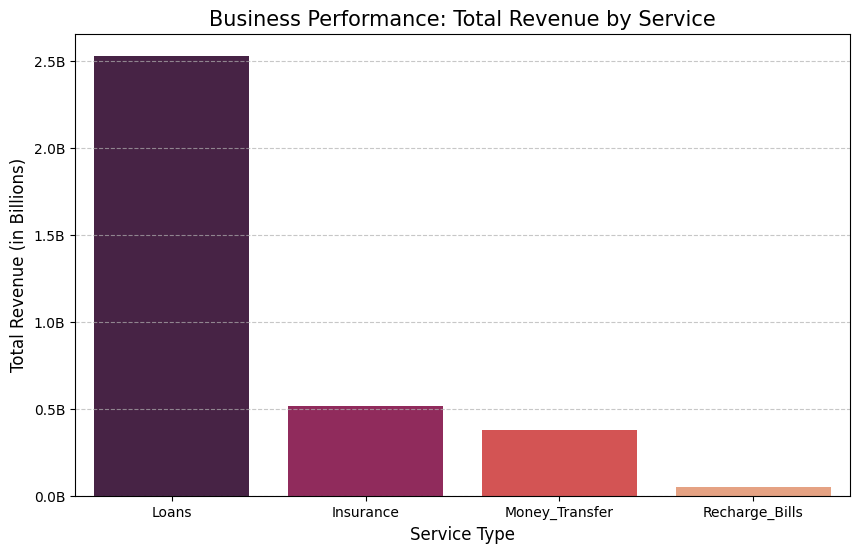

In [152]:
plt.figure(figsize=(10, 6))
barchart = sns.barplot(x='Service Category', y='Total Revenue', data=revenue_df, palette='rocket', hue = 'Service Category', legend = False)

plt.title('Business Performance: Total Revenue by Service', fontsize=15)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Total Revenue (in Billions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

import matplotlib.ticker as ticker

# Formatting the Y-axis to show "Billions" or "Crores" instead of 1e9
# The function divides the value by 1 billion for readability
barchart.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B'))

plt.title('Business Performance: Total Revenue by Service', fontsize=15)
plt.ylabel('Total Revenue (in Billions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [64]:
failed_df = df[df['Payment_Status'] != 'Successful']

In [66]:
failed_df

,Transaction_ID,Amount,User_ID,Service,Service Type,Payment_Status,Reason,Date
12,RCG_43541CA10FD1,379.19,PP1089257,Recharge_Bills,Cable TV,Failed,Insufficient amount,10/17/2024
72,RCG_F417B39DA523,1507.36,PP0015723,Recharge_Bills,FASTag Recharge,Failed,Wrong PIN,9/19/2024
78,RCG_C445B3AC15EC,1134.71,PP1087154,Recharge_Bills,Cable TV,Failed,Wrong PIN,5/15/2024
98,RCG_832A37907241,1862.65,PP1068689,Recharge_Bills,FASTag Recharge,Failed,Wrong PIN,8/15/2024
122,RCG_62A8C8187B46,133.72,PP0017903,Recharge_Bills,Mobile Recharge,Failed,Wrong PIN,3/4/2024
...,...,...,...,...,...,...,...,...
299940,INS_ED8E742ECE01,13603.32,PP1103813,Insurance,Car,Failed,Server error,2/19/2024
299972,INS_18510DF91F76,18073.46,PP0030476,Insurance,Term Life,Failed,Server error,7/16/2024
299981,INS_E8004896177A,669.55,PP0031783,Insurance,Car,Failed,Wrong PIN,11/27/2024
299991,INS_BC8A99DE9116,2204.87,PP1090475,Insurance,Car,Failed,Wrong PIN,6/1/2024


In [96]:
failure_analysis = failed_df['Reason'].value_counts()

In [77]:
print("Top reasons for transaction failure:")
failure_analysis

Top reasons for transaction failure:


Reason
Server error           4053
Wrong PIN              3315
Insufficient amount    3304
Wrong Info              700
Bank Denied             635
Name: count, dtype: int64

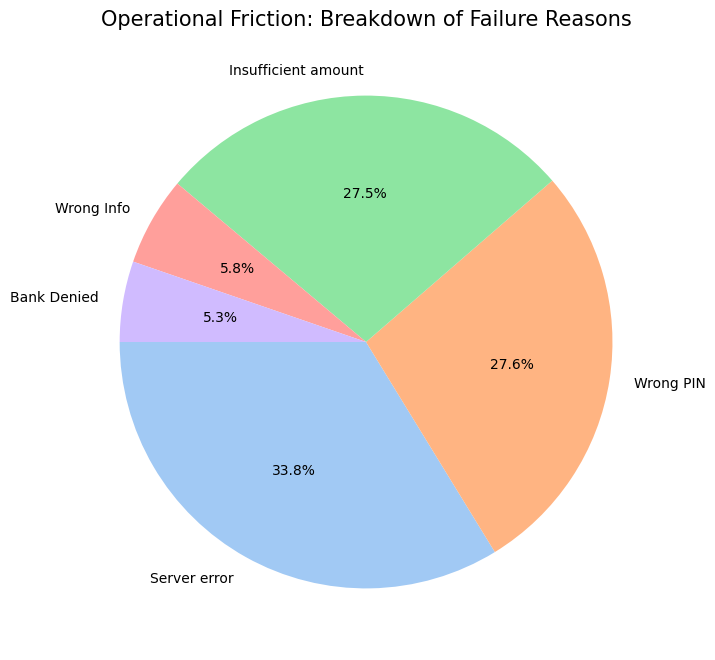

In [159]:
plt.figure(figsize=(8, 8))
plt.pie(failure_analysis, labels=failure_analysis.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Operational Friction: Breakdown of Failure Reasons', fontsize=15)
plt.show()

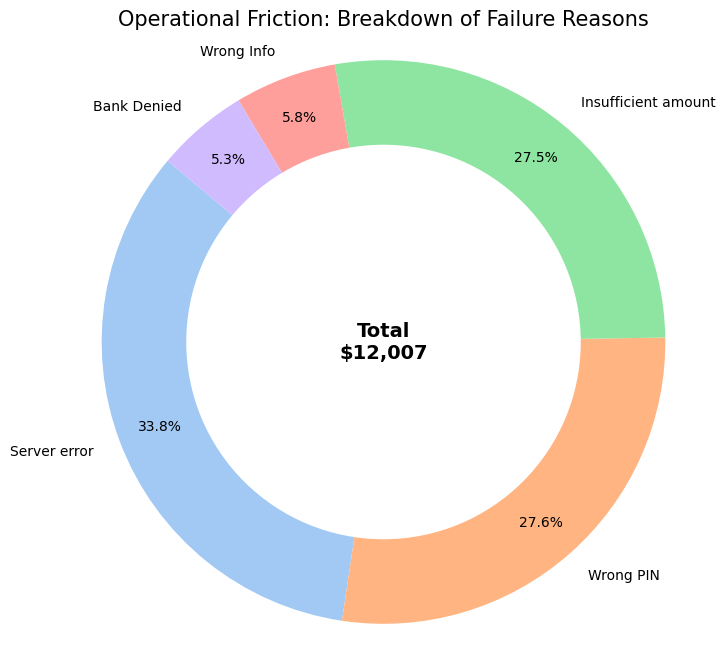

In [173]:
plt.figure(figsize=(8, 8))
plt.pie(failure_analysis, labels=failure_analysis.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), pctdistance = 0.85)
plt.title('Operational Friction: Breakdown of Failure Reasons', fontsize=15)

# Create a circle for the center
# 'w' is white, and 0.70 is the radius (size of the hole)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 3. Add text in the center (Optional but looks great)
total_failures = failure_analysis.sum()
plt.text(0, 0, f'Total\n${total_failures:,}', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Operational Friction: Breakdown of Failure Reasons', fontsize=15)
plt.axis('equal')  # Ensures the donut is a perfect circle
plt.show()

In [86]:
avg_per_type = df.groupby('Service Type')['Amount'].sum().sort_values(ascending = False)
avg_per_type

Service Type
Bike Loan           6.436441e+08
Mutual Fund         6.342093e+08
Gold Loan           6.324125e+08
Credit Score        6.222435e+08
Car                 1.293481e+08
Term Life           1.288615e+08
Bike                1.281032e+08
Health              1.266101e+08
To UPI ID           9.519371e+07
To Self Account     9.440188e+07
To QR Code          9.431098e+07
To Mobile Number    9.428807e+07
FASTag Recharge     1.281511e+07
DTH                 1.263572e+07
Mobile Recharge     1.263093e+07
Cable TV            1.261321e+07
Name: Amount, dtype: float64

In [88]:
# Converting to a DataFrame for a cleaner look
avgpertype_df = avg_per_type.reset_index()
avgpertype_df.columns = ['Service Type','Total Revenue']
avgpertype_df

,Service Type,Total Revenue
0,Bike Loan,6.436441e+08
1,Mutual Fund,6.342093e+08
2,Gold Loan,6.324125e+08
3,Credit Score,6.222435e+08
4,Car,1.293481e+08
5,Term Life,1.288615e+08
6,Bike,1.281032e+08
7,Health,1.266101e+08
8,To UPI ID,9.519371e+07
9,To Self Account,9.440188e+07


In [90]:
avgpertype_df.head(11)

,Service Type,Total Revenue
0,Bike Loan,6.436441e+08
1,Mutual Fund,6.342093e+08
2,Gold Loan,6.324125e+08
3,Credit Score,6.222435e+08
4,Car,1.293481e+08
5,Term Life,1.288615e+08
6,Bike,1.281032e+08
7,Health,1.266101e+08
8,To UPI ID,9.519371e+07
9,To Self Account,9.440188e+07


In [92]:
# Key Insights:
# Loans is the massive leader in revenue ($2.5B+), followed by Insurance. So, marketing budgets should be heavily allocated toward the "Loans" segment since it has the highest financial impact.

# Server error, Wrong PIN, and Insufficient amount are top issues.
# For Server error, there should be an IT infrastructure audit.
# For Wrong PIN, a "Show PIN" feature or a biometric (fingerprint) login should be added to reduce user error.
# For Insufficient amount, there should be a "Low Balance Alert" feature before the user hits "Pay."

In [174]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for 'Month' and 'Day_of_Week'
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

# Look at the first few rows to see the new columns
print(df[['Date', 'Month', 'Day_of_Week']].head())

        Date      Month Day_of_Week
0 2024-06-09       June      Sunday
1 2024-08-04     August      Sunday
2 2024-02-19   February      Monday
3 2024-12-22   December      Sunday
4 2024-09-07  September    Saturday


In [175]:
# Group by Month and sum the Amount
monthly_revenue = df.groupby('Month')['Amount'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

print("Monthly Revenue Performance:")
print(monthly_revenue)

Monthly Revenue Performance:
Month
January      2.934558e+08
February     2.788757e+08
March        2.927008e+08
April        2.835865e+08
May          2.960572e+08
June         2.863175e+08
July         3.044851e+08
August       2.902145e+08
September    2.829055e+08
October      2.949422e+08
November     2.846212e+08
December     2.861599e+08
Name: Amount, dtype: float64


In [176]:
# Count transactions by Day of the Week
daily_traffic = df['Day_of_Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print("Transaction Volume by Day:")
print(daily_traffic)

Transaction Volume by Day:
Day_of_Week
Monday       43442
Tuesday      43223
Wednesday    42985
Thursday     42898
Friday       42264
Saturday     42346
Sunday       42842
Name: count, dtype: int64


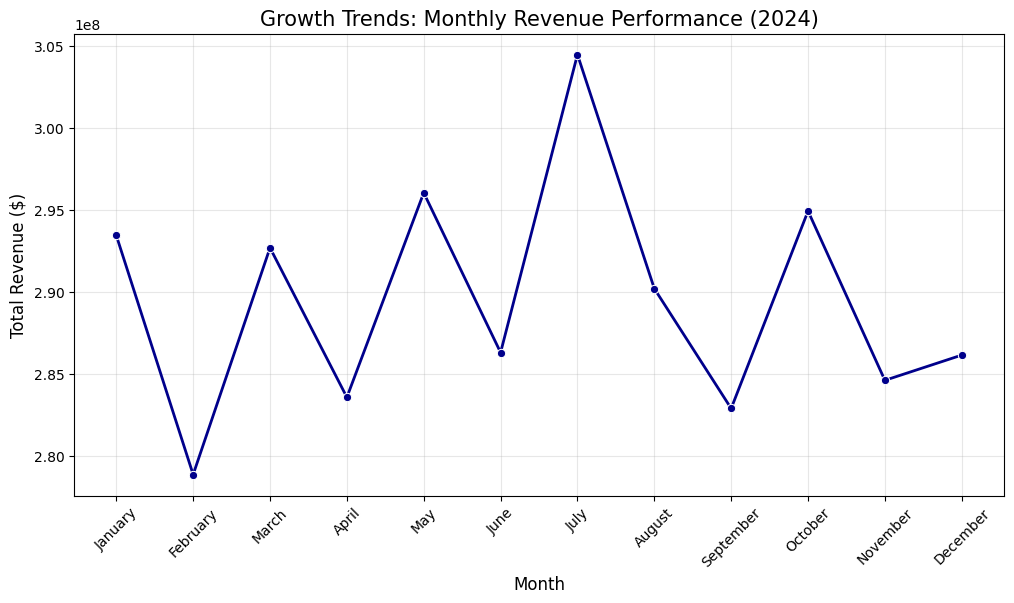

In [184]:
# Monthly Revenue Trend (Line Chart)
# Ensure months are in the correct calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Re-calculating to ensure order
monthly_trend = df.groupby('Month')['Amount'].sum().reindex(month_order)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='darkblue', linewidth=2)

plt.title('Growth Trends: Monthly Revenue Performance (2024)', fontsize=15)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [177]:
# Group by User_ID to see frequency and total spend
user_segments = df.groupby('User_ID').agg({
    'Transaction_ID': 'count',
    'Amount': 'sum'
}).rename(columns={'Transaction_ID': 'Frequency', 'Amount': 'Total_Spend'})

# Sort by Total Spend to see the biggest customers
print(user_segments.sort_values(by='Total_Spend', ascending=False).head())

           Frequency  Total_Spend
User_ID                          
PP0028780          6    349166.69
PP1075901          8    341614.07
PP0019432          6    340158.16
PP1073199          4    339374.81
PP0035403          8    338375.08


In [178]:
# Define a function to segment users
def segment_customer(spend):
    if spend > 50000:  # High ticket spenders
        return 'VIP / High Value'
    elif spend > 10000:
        return 'Regular User'
    else:
        return 'Occasional User'

# Apply the segmentation
user_segments['Customer_Segment'] = user_segments['Total_Spend'].apply(segment_customer)

# See the distribution of your customer base
segment_counts = user_segments['Customer_Segment'].value_counts()
print(segment_counts)

Customer_Segment
Occasional User     40350
Regular User        33759
VIP / High Value    26652
Name: count, dtype: int64


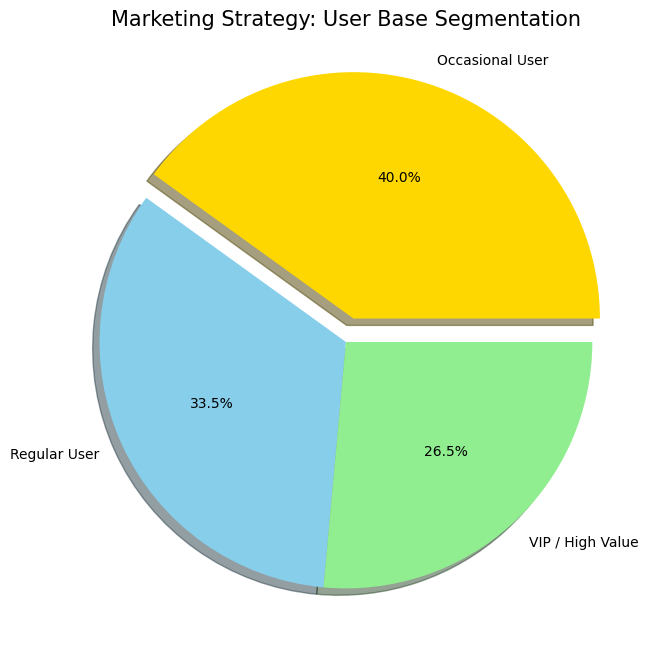

In [183]:
# Customer Segment Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
# Using the segment_counts from the Level 4 code
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        explode=(0.1, 0, 0), colors=['#FFD700', '#87CEEB', '#90EE90'], shadow=True)

plt.title('Marketing Strategy: User Base Segmentation', fontsize=15)
plt.show()

In [192]:
!pip install scipy

   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   -- ------------------------------------- 2.6/37.1 MB 13.8 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/37.1 MB 16.1 MB/s eta 0:00:02
   --------- ------------------------------ 8.9/37.1 MB 15.0 MB/s eta 0:00:02
   ------------ --------------------------- 11.5/37.1 MB 14.5 MB/s eta 0:00:02
   --------------- ------------------------ 14.4/37.1 MB 14.1 MB/s eta 0:00:02
   ------------------ --------------------- 17.0/37.1 MB 13.9 MB/s eta 0:00:02
   --------------------- ------------------ 19.7/37.1 MB 13.8 MB/s eta 0:00:02
   ------------------------ --------------- 22.3/37.1 MB 13.7 MB/s eta 0:00:02
   --------------------------- ------------ 25.2/37.1 MB 13.6 MB/s eta 0:00:01
   ----------------------------- ---------- 27.8/37.1 MB 13.5 MB/s eta 0:00:01
   -------------------------------- ------- 30.4/37.1 MB 13.5 MB/s eta 0:00:01
   ----------------------------------- ---- 33.3/37.1 MB 13.4 MB

In [193]:
from scipy import stats
loans = df[df['Service'] == 'Loans']['Amount']
insurance = df[df['Service'] == 'Insurance']['Amount']
t_stat, p_val = stats.ttest_ind(loans, insurance)
print(f"P-Value: {p_val}")

P-Value: 0.0


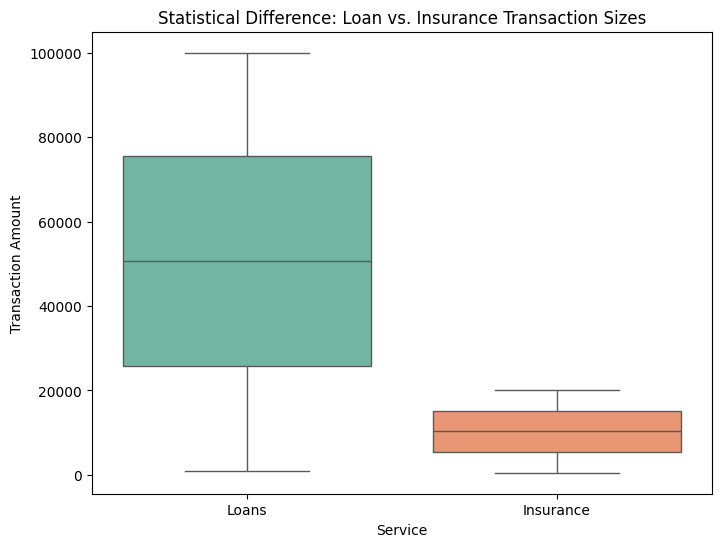

In [201]:
loans_insurance = df[df['Service'].isin(['Loans', 'Insurance'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Service', y='Amount', data=loans_insurance, hue='Service', palette='Set2')

plt.title('Statistical Difference: Loan vs. Insurance Transaction Sizes')
plt.ylabel('Transaction Amount')
plt.show()


In [194]:
contingency_table = pd.crosstab(df['Service'], df['Payment_Status'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"P-Value: {p_val}")

P-Value: 0.0


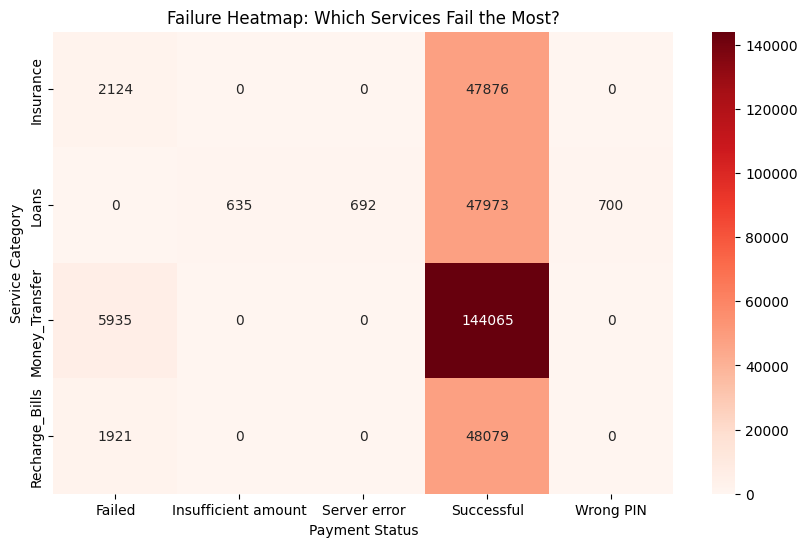

In [200]:
contingency_table = pd.crosstab(df['Service'], df['Payment_Status'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds')

plt.title('Failure Heatmap: Which Services Fail the Most?')
plt.ylabel('Service Category')
plt.xlabel('Payment Status')
plt.show()